In [1]:
import geopandas
import geoplot
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc

import warnings
warnings.filterwarnings('ignore')

C:\Users\Lewis\anaconda\envs\geo_env\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
# Get data to test function.
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

world.sort_values(by=['name'])
world['name'] = world['name'].str.upper()

data2014 = pd.read_csv("data/2014.csv")
totalEmissions = data2014[['Country','Total']]

emissionWorld = pd.merge(world, totalEmissions, how='inner', left_on='name', right_on='Country')

In [11]:
def printMap(emissionData):
    
    # This defines the bins into which countries are sorted by emission totals.
    bins = [1000, 10000, 50000, 100000, 500000, 1000000, 10000000]
    # This sets these bins as the custom scheme.
    scheme = mc.UserDefined(emissionData['Total'], bins)
    
    # Draw map with geoplot.
    figure = geoplot.choropleth(
        emissionData, hue='Total', figsize=(10, 5), scheme=scheme, legend=True, cmap='Oranges'
    )
    
    figure.figure.savefig('exportedMap.png')
    
    

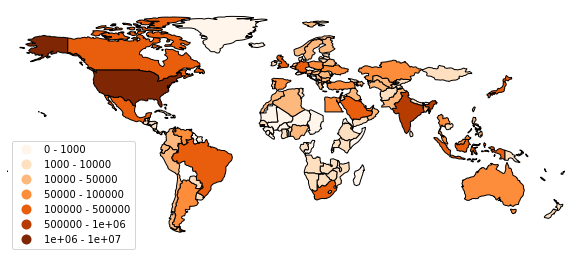

In [12]:
printMap(emissionWorld)